# Data Preprocessing

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('raw_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Volume       264 non-null    int64  
 1   Toll Price   264 non-null    float64
 2   Gas Price    264 non-null    float64
 3   Travel Time  264 non-null    float64
 4   Decision     264 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 10.4 KB


## Data Visualization

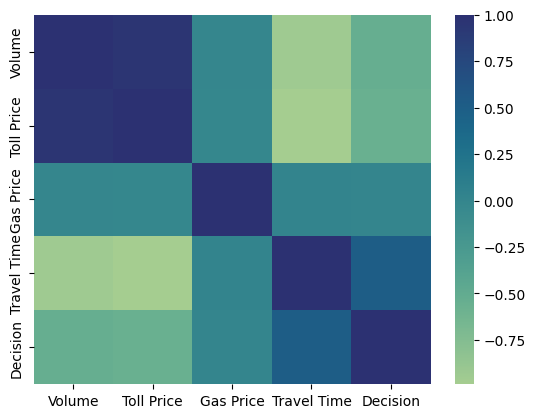

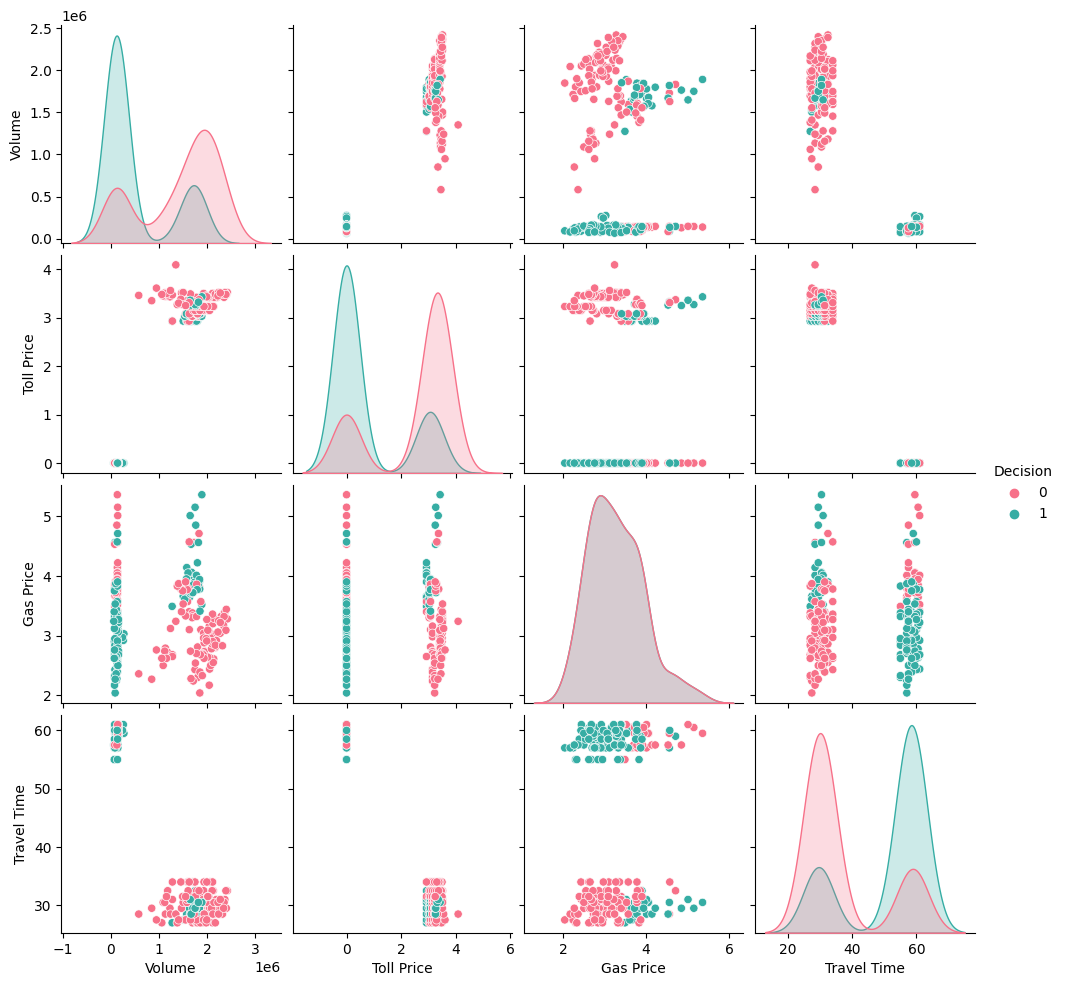

In [ ]:
sns.heatmap(dataset.corr(),cmap="crest")
sns.pairplot(dataset, hue="Decision", palette="husl")

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                  test_size = 0.2, random_state = 1)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Naive Bayes

## Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1)[:5])

[[0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]]


 ## Check accuracy score 

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8113


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[24  6]
 [ 4 19]]


0.8113207547169812

## Visualizing the Confusion Matrix

<Axes: >

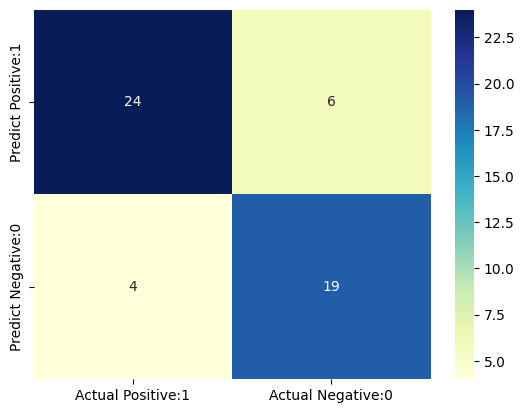

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Build Decision Boundary Graphs

> 縮排段落



# Random Forest

## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

## Pull out one tree from the forest


In [ ]:
import pydot
Tree = classifier.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=12);

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), 
                      y_test.reshape(len(y_test),1)),1)[:5])

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

## Visualizing the Confusion Matrix

In [ ]:
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Making a feature importance plot


In [ ]:
feature_importances = classifier.feature_importances_
fm = [0.22442348, 0.60539592, 0.17018061]
feature_names = ["Volume", "Price", "Travel Time"]
sns.barplot(x=fm, y=feature_names, color='steelblue')

## Generate new data and predict the *label*

In [ ]:
# print(classifier.predict([[121070, 2.1, 3, 20]]))
print(X_test)